## Chevron

In [57]:
import numpy as np 
import pandas as pd
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

from catboost import CatBoostRegressor, Pool
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from sklearn.feature_selection import SelectKBest, mutual_info_regression
dirname=os.getcwd()+"//Tracks//Chevron//Train//"

In [2]:
training_data=pd.read_csv(dirname+"training.csv")

In [3]:
training_data.shape

(29692, 31)

In [4]:
training_data.head()

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [5]:
training_data.columns

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    29692 non-null  int64  
 1   surface_x                     29692 non-null  float64
 2   surface_y                     29692 non-null  float64
 3   bh_x                          27605 non-null  float64
 4   bh_y                          27605 non-null  float64
 5   standardized_operator_name    29692 non-null  int64  
 6   gross_perforated_length       22135 non-null  float64
 7   number_of_stages              2752 non-null   float64
 8   total_proppant                19080 non-null  float64
 9   total_fluid                   19076 non-null  float64
 10  true_vertical_depth           28197 non-null  float64
 11  ffs_frac_type                 14585 non-null  object 
 12  proppant_intensity            18971 non-null  float64
 13  f

In [7]:
null_col=[]
for col in training_data.columns:
    if(training_data[col].isnull().sum()!=0):
        null_col.append(col)
    else:
        print(col)

Unnamed: 0
surface_x
surface_y
standardized_operator_name
pad_id
frac_type


In [8]:
for col in null_col:
    print("No of Null values in ",col,training_data[col].isnull().sum())

No of Null values in  bh_x 2087
No of Null values in  bh_y 2087
No of Null values in  gross_perforated_length 7557
No of Null values in  number_of_stages 26940
No of Null values in  total_proppant 10612
No of Null values in  total_fluid 10616
No of Null values in  true_vertical_depth 1495
No of Null values in  ffs_frac_type 15107
No of Null values in  proppant_intensity 10721
No of Null values in  frac_fluid_intensity 10746
No of Null values in  average_stage_length 26968
No of Null values in  average_proppant_per_stage 27003
No of Null values in  average_frac_fluid_per_stage 27005
No of Null values in  proppant_to_frac_fluid_ratio 11036
No of Null values in  frac_fluid_to_proppant_ratio 11036
No of Null values in  bin_lateral_length 7557
No of Null values in  relative_well_position 9225
No of Null values in  batch_frac_classification 9225
No of Null values in  well_family_relationship 9225
No of Null values in  frac_seasoning 14924
No of Null values in  horizontal_midpoint_x 1001
No o

# Handling Null Values

In [9]:
drop_cols=list()
for col in null_col:
    if training_data[col].isnull().sum()/training_data.shape[0] >0.8:
        drop_cols.append(col)
training_data.drop(columns=drop_cols,inplace=True)

In [10]:
cat_col=[]
num_col=[]
for col in training_data.columns:
    if(training_data[col].dtypes=='object'):
        cat_col.append(col)
    else:
        num_col.append(col)

In [11]:
print("No of categorical columns ",len(cat_col),"\n",cat_col)

No of categorical columns  5 
 ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', 'frac_type']


In [12]:
print(num_col)

['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name', 'gross_perforated_length', 'total_proppant', 'total_fluid', 'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity', 'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio', 'bin_lateral_length', 'pad_id', 'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate']


In [13]:
for col in cat_col:
    print("No of unique values in ",col,len(training_data[col].value_counts()),"\n")

No of unique values in  ffs_frac_type 6 

No of unique values in  relative_well_position 4 

No of unique values in  batch_frac_classification 4 

No of unique values in  well_family_relationship 4 

No of unique values in  frac_type 3 



In [14]:
for col in cat_col:
    print("Unique values of",training_data[col].value_counts(),"\n")    
    training_data[col].replace(["Undefined","Unknown","Unknown"],np.nan,inplace=True)

Unique values of ffs_frac_type
Slickwater Only                5036
Slickwater Crosslink Hybrid    4410
Slickwater Linear Hybrid       3148
Undefined                      1015
Crosslink Only                  902
Linear Only                      74
Name: count, dtype: int64 

Unique values of relative_well_position
Standalone Well    8671
Outer Well         6294
Inner Well         4905
Unknown             597
Name: count, dtype: int64 

Unique values of batch_frac_classification
Non-Batch Frac           7150
Unknown                  5756
Batch-Concurrent Frac    4707
Batch-Sequential Frac    2854
Name: count, dtype: int64 

Unique values of well_family_relationship
Standalone Well      8671
Sibling Well         7283
Infill Child Well    3916
Unknown               597
Name: count, dtype: int64 

Unique values of frac_type
Primary Frac       29602
Refrac                89
Protection Frac        1
Name: count, dtype: int64 



## Handling null values in categorical column 

In [15]:
for col in cat_col:
    if training_data[col].isnull().sum()>0:
        proportions = training_data[col].value_counts(normalize=True)
        training_data[col] = training_data[col].fillna(pd.Series(np.random.choice(proportions.index, p=proportions.values, size=len(training_data))))
        print(col,training_data[col].isnull().sum())

ffs_frac_type 0
relative_well_position 0
batch_frac_classification 0
well_family_relationship 0


In [16]:
for col in cat_col:
    print("No of null values in ",col,training_data[col].isnull().sum(),"\n")

No of null values in  ffs_frac_type 0 

No of null values in  relative_well_position 0 

No of null values in  batch_frac_classification 0 

No of null values in  well_family_relationship 0 

No of null values in  frac_type 0 



In [17]:
for col in cat_col:
    print("Unique values of",training_data[col].value_counts(),"\n")

Unique values of ffs_frac_type
Slickwater Only                11104
Slickwater Crosslink Hybrid     9640
Slickwater Linear Hybrid        6858
Crosslink Only                  1928
Linear Only                      162
Name: count, dtype: int64 

Unique values of relative_well_position
Standalone Well    12972
Outer Well          9440
Inner Well          7280
Name: count, dtype: int64 

Unique values of batch_frac_classification
Non-Batch Frac           14413
Batch-Concurrent Frac     9475
Batch-Sequential Frac     5804
Name: count, dtype: int64 

Unique values of well_family_relationship
Standalone Well      13025
Sibling Well         10881
Infill Child Well     5786
Name: count, dtype: int64 

Unique values of frac_type
Primary Frac       29602
Refrac                89
Protection Frac        1
Name: count, dtype: int64 



# Handling null values in the numerical columns

In [18]:
null_col=[]
non_null_col=[]
for col in training_data.columns:
    if(training_data[col].isnull().sum()!=0):
        null_col.append(col)
    else:
        non_null_col.append(col)
null_col.remove("OilPeakRate")    
non_null_col.remove("Unnamed: 0")
numeric_columns = training_data.select_dtypes(include=['float64', 'int64']).columns
non_null_numeric_columns = [col for col in numeric_columns if not training_data[col].isnull().any()]
non_null_numeric_columns.remove("Unnamed: 0")

In [19]:
for col in null_col:
    print("No of Null values in ",col,training_data[col].isnull().sum())

No of Null values in  bh_x 2087
No of Null values in  bh_y 2087
No of Null values in  gross_perforated_length 7557
No of Null values in  total_proppant 10612
No of Null values in  total_fluid 10616
No of Null values in  true_vertical_depth 1495
No of Null values in  proppant_intensity 10721
No of Null values in  frac_fluid_intensity 10746
No of Null values in  proppant_to_frac_fluid_ratio 11036
No of Null values in  frac_fluid_to_proppant_ratio 11036
No of Null values in  bin_lateral_length 7557
No of Null values in  frac_seasoning 14924
No of Null values in  horizontal_midpoint_x 1001
No of Null values in  horizontal_midpoint_y 1001
No of Null values in  horizontal_toe_x 711
No of Null values in  horizontal_toe_y 711


In [20]:
training_data.columns

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'total_proppant', 'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [21]:

for i in range(4):
    for col in null_col:
        correlation_matrix = training_data[non_null_numeric_columns].corrwith(training_data[col])
        filtered_correlations = correlation_matrix[abs(correlation_matrix) > abs(0.2)]
        if not filtered_correlations.empty:
            corr_list=filtered_correlations.index.tolist()
            l=corr_list+[col]
            impute_df = training_data[l]
            impute_df = impute_df[impute_df[col].notnull()]
            X = impute_df[corr_list]
            y = impute_df[col]
            nn = NearestNeighbors(n_neighbors=3).fit(X)

            null_values = training_data[col].isnull()
            for idx in training_data[null_values].index:
                values_to_impute = np.array([training_data.loc[idx, corr_list]])
                _, neighbor_index = nn.kneighbors(values_to_impute)
                nearest_category = y.iloc[neighbor_index[0, 0]]
                training_data.loc[idx, col] = nearest_category
            null_col.remove(col)
            non_null_numeric_columns.append(col)        

In [22]:
null_col

['frac_fluid_to_proppant_ratio', 'frac_seasoning']

In [23]:
training_data[training_data['frac_seasoning']==np.inf]['frac_seasoning']=None

In [24]:
# subject expert: In general, a higher frac fluid to proppant ratio might indicate a more fluid-intensive fracturing treatment,
# while a lower ratio suggests a more proppant-intensive treatment
all_columns = null_col + non_null_numeric_columns
selected_data = training_data[all_columns]
selected_data.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(selected_data)

training_data[all_columns] = imputed_data

In [25]:
training_data.drop(columns=['Unnamed: 0'],inplace=True)
# training_data.to_csv("modified_training_data.csv")

# Feature Encoding

In [26]:
training_data=pd.read_csv("modified_training_data.csv")
training_data.drop(columns=['Unnamed: 0'],inplace=True)

In [27]:
cat_col=[]
num_col=[]
for col in training_data.columns:
    if(training_data[col].dtypes=='object'):
        cat_col.append(col)
    else:
        num_col.append(col)

In [28]:
training_data['frac_type'].replace(["Primary Frac"],1,inplace=True)
training_data['frac_type'].replace(["Refrac","Protection Frac"],0,inplace=True)

In [29]:
encoded_data = pd.get_dummies(training_data, columns=cat_col[:-1])
encoded_data.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,...,ffs_frac_type_Slickwater Only,relative_well_position_Inner Well,relative_well_position_Outer Well,relative_well_position_Standalone Well,batch_frac_classification_Batch-Concurrent Frac,batch_frac_classification_Batch-Sequential Frac,batch_frac_classification_Non-Batch Frac,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well
0,1383493.751,717329.2368,1382854.564,712767.3700,1121.0,3963.582677,76000.0000,2.219894e+06,8712.598425,19.174572,...,False,False,False,True,False,True,False,False,False,True
1,1380344.035,711916.2732,1379738.429,707860.5643,1022.0,3179.133858,113000.0000,5.610964e+05,8627.952756,35.544272,...,False,False,True,False,False,True,False,True,False,False
2,1379915.895,717845.0063,1379274.644,713471.9952,1304.0,3810.039370,286571.4286,1.621424e+06,8801.181102,75.214821,...,False,False,False,True,False,False,True,False,False,True
3,1383567.443,706640.2010,1382891.477,702068.3838,1022.0,3723.425197,106878.9286,4.377134e+05,8635.826772,28.704465,...,False,False,False,True,True,False,False,False,False,True
4,1378962.585,702623.9787,1379643.546,707204.9131,1022.0,3811.023622,112789.7143,6.229802e+05,8664.370079,29.595648,...,False,False,True,False,True,False,False,True,False,False


In [30]:
encoded_data.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name',
       'gross_perforated_length', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'frac_type', 'frac_seasoning',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y', 'OilPeakRate', 'ffs_frac_type_Crosslink Only',
       'ffs_frac_type_Linear Only',
       'ffs_frac_type_Slickwater Crosslink Hybrid',
       'ffs_frac_type_Slickwater Linear Hybrid',
       'ffs_frac_type_Slickwater Only', 'relative_well_position_Inner Well',
       'relative_well_position_Outer Well',
       'relative_well_position_Standalone Well',
       'batch_frac_classification_Batch-Concurrent Frac',
       'batch_frac_classification_Batch-Sequential Frac',
       'batch_frac_classification_Non-Batch Frac',
       'well

# Model Implementation
## part 1 (without scaling, train,valid) 

### CatBoostRegressor before encoding

In [31]:
X = training_data[training_data['OilPeakRate'].isnull()==False].drop('OilPeakRate', axis=1)  
y = training_data[training_data['OilPeakRate'].isnull()==False]['OilPeakRate'] 

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
cat_idx = [idx for idx, col in enumerate(training_data.columns) if col in cat_col]

In [34]:
for col_idx in cat_idx:
    X_train.iloc[:, col_idx] = X_train.iloc[:, col_idx].astype(str)
    X_val.iloc[:, col_idx] = X_val.iloc[:, col_idx].astype(str)

# Create CatBoost pools
training_pool = Pool(X_train, y_train, cat_features=cat_idx)
val_pool = Pool(X_val, y_val, cat_features=cat_idx)

# Initialize and train the CatBoostRegressor
cat_regressor = CatBoostRegressor(iterations=1000, verbose=100, learning_rate=0.3, loss_function='RMSE')
cat_regressor.fit(training_pool, eval_set=val_pool)

# Make predictions on the validation set
y_pred_cat = cat_regressor.predict(val_pool)

0:	learn: 141.1093941	test: 138.3067941	best: 138.3067941 (0)	total: 218ms	remaining: 3m 37s
100:	learn: 89.9346201	test: 100.3116285	best: 100.3116285 (100)	total: 7.86s	remaining: 1m 9s
200:	learn: 78.7856937	test: 97.9031150	best: 97.9031150 (200)	total: 15.2s	remaining: 1m
300:	learn: 71.3643078	test: 97.1768115	best: 97.1627812 (299)	total: 21.4s	remaining: 49.6s
400:	learn: 66.0913343	test: 96.8412421	best: 96.8409283 (399)	total: 28.4s	remaining: 42.4s
500:	learn: 61.4192399	test: 96.5591110	best: 96.5131743 (473)	total: 36.1s	remaining: 36s
600:	learn: 57.4516007	test: 96.4231118	best: 96.2688287 (586)	total: 45.1s	remaining: 29.9s
700:	learn: 53.8567770	test: 96.4282148	best: 96.2688287 (586)	total: 51.7s	remaining: 22.1s
800:	learn: 50.7899844	test: 96.6685884	best: 96.2688287 (586)	total: 58.4s	remaining: 14.5s
900:	learn: 47.8000606	test: 96.4792928	best: 96.2688287 (586)	total: 1m 5s	remaining: 7.16s
999:	learn: 45.3606352	test: 96.4650638	best: 96.2688287 (586)	total: 1m 

In [35]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, cat_regressor.predict(X_val)))

print(f'Root Mean Squared Error on validation set: {rmse}')

Root Mean Squared Error on validation set: 96.26882828895685


In [151]:
cat_regressor_2 = CatBoostRegressor(iterations=1500, verbose=200, learning_rate=0.2, loss_function='RMSE')
cat_regressor_2.fit(training_pool, eval_set=val_pool)

# Make predictions on the validation set
y_pred_cat_2 = cat_regressor_2.predict(val_pool)

0:	learn: 145.7296278	test: 143.0700188	best: 143.0700188 (0)	total: 45.4ms	remaining: 1m 8s
200:	learn: 86.0616844	test: 99.4227801	best: 99.3826853 (191)	total: 6.98s	remaining: 45.1s
400:	learn: 74.4277181	test: 96.9808971	best: 96.9808971 (400)	total: 13.5s	remaining: 37s
600:	learn: 65.8669849	test: 96.0068233	best: 95.9507139 (591)	total: 19.9s	remaining: 29.8s
800:	learn: 59.7259455	test: 95.6492176	best: 95.6492176 (800)	total: 26.4s	remaining: 23s
1000:	learn: 54.6010527	test: 95.5572094	best: 95.5572094 (1000)	total: 33s	remaining: 16.4s
1200:	learn: 50.5170334	test: 95.5713424	best: 95.5170325 (1186)	total: 39.5s	remaining: 9.82s
1400:	learn: 46.9365779	test: 95.4690056	best: 95.3965654 (1333)	total: 46.1s	remaining: 3.26s
1499:	learn: 45.3745444	test: 95.4500900	best: 95.3965654 (1333)	total: 49.5s	remaining: 0us

bestTest = 95.39656538
bestIteration = 1333

Shrink model to first 1334 iterations.


### Models for encoded data

In [36]:
encoded_data['OilPeakRate'].isnull().sum()

10386

In [37]:
train_en=encoded_data[encoded_data['OilPeakRate'].isnull()==False]

In [38]:
test_en=encoded_data[encoded_data['OilPeakRate'].isnull()==True]

In [39]:
train_en.shape,test_en.shape

((19306, 36), (10386, 36))

In [40]:
X_en = train_en.drop('OilPeakRate', axis=1)  
y_en = train_en['OilPeakRate'] 

In [41]:
X_train_en, X_val_en, y_train_en,y_val_en= train_test_split(X_en, y_en, test_size=0.2, random_state=42)
X_test_en=test_en.drop('OilPeakRate', axis=1)  
y_test_en=test_en['OilPeakRate']

In [42]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_en, y_train_en)

SGDRegressor()

In [43]:
rmse_sgd = np.sqrt(mean_squared_error(y_val_en, sgd_reg.predict(X_val_en)))
print(f'Root Mean Squared Error on validation set: {rmse_sgd}')

Root Mean Squared Error on validation set: 3.1532713201732535e+21


models: No point in using linear regression as the rmse is very high (10 to the power of 21)

### Random Forest

In [137]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
RF_regressor.fit(X_train_en, y_train_en)

RandomForestRegressor(random_state=42)

In [138]:
rmse_rf = np.sqrt(mean_squared_error(y_val_en, RF_regressor.predict(X_val_en)))
print(f'Root Mean Squared Error on validation set: {rmse_rf}')

Root Mean Squared Error on validation set: 97.218744630991


In [139]:
rfc_2 = RandomForestRegressor()

random_grid_2 = {"n_estimators": [500,600,700],
               "max_features": ["log2"],
               "max_depth": [22,25,30]
              }

rfc_rs_2 = RandomizedSearchCV(rfc_2, 
                            param_distributions = random_grid_2,
                            cv = 4, 
                            n_iter = 100, 
                            )
rfc_rs_2.fit(X_train_en,y_train_en)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [22, 25, 30],
                                        'max_features': ['log2'],
                                        'n_estimators': [500, 600, 700]})

In [140]:
print(rfc_rs_2.best_params_)

{'n_estimators': 700, 'max_features': 'log2', 'max_depth': 25}


In [46]:
RF_regressor = RandomForestRegressor(n_estimators=600, max_features='log2', max_depth=30,random_state=42)
RF_regressor.fit(X_train_en, y_train_en)

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=600,
                      random_state=42)

In [47]:
rmse_rf_2 = np.sqrt(mean_squared_error(y_val_en, RF_regressor.predict(X_val_en)))
print(f'Root Mean Squared Error on validation set: {rmse_rf_2}')

Root Mean Squared Error on validation set: 95.09515891410827


### KNN

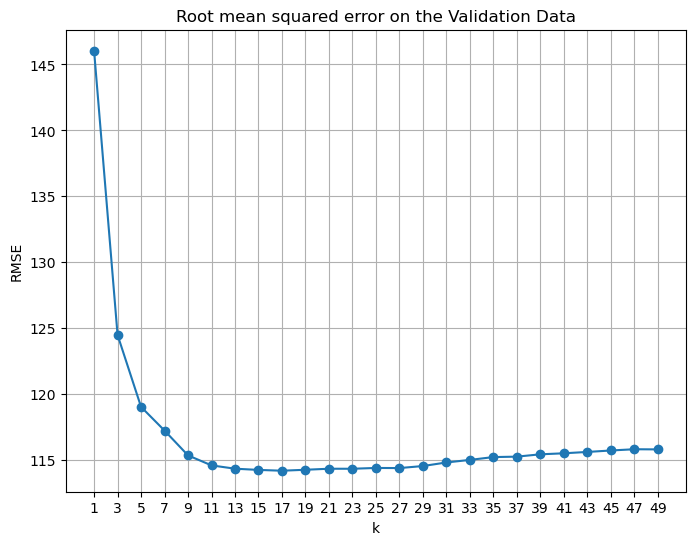

In [48]:
from sklearn.neighbors import KNeighborsRegressor
k_values = []
rmse_error = []

for k in range(1, 50,2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train_en, y_train_en)
    y_val_pred = model.predict(X_val_en)
    rmse_error.append(np.sqrt(mean_squared_error(y_val_pred, y_val_en)))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, rmse_error, marker = "o")
plt.title("Root mean squared error on the Validation Data")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.xticks(k_values)
plt.grid();

In [49]:
knn_regression = KNeighborsRegressor(n_neighbors=17)
knn_regression.fit(X_train_en, y_train_en)

KNeighborsRegressor(n_neighbors=17)

In [50]:
rmse_knn = np.sqrt(mean_squared_error(y_val_en, knn_regression.predict(X_val_en)))
print("The root mean sqaured error is",rmse_knn)

The root mean sqaured error is 114.20493365324144


### Decision Tree Regressor

In [142]:
max_depth = []
rmse_train = []
rmse_val = []


for i in range(1, 20):
    model = DecisionTreeRegressor(criterion='squared_error', max_depth=i)
    model.fit(X_train_en, y_train_en)
    y_train_pred = model.predict(X_train_en)
    rmse_train.append(np.sqrt(mean_squared_error(y_train_pred, y_train_en)))
    y_val_pred = model.predict(X_val_en)
    rmse_val.append(np.sqrt(mean_squared_error(y_val_pred, y_val_en)))
    max_depth.append(i)
    
k = pd.DataFrame({'max_depth': max_depth,
                  'rmse_train': rmse_train,
                  'rmse_val': rmse_val
                 })
  

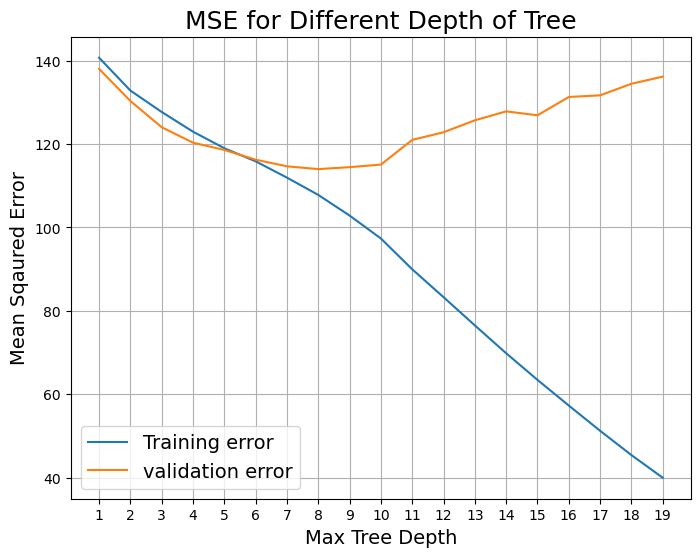

In [143]:
plt.figure(figsize = (8, 6))

plt.plot(k.max_depth, k.rmse_train, label='Training error')
plt.plot(k.max_depth, k.rmse_val , label='validation error')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.xticks(list(range(1,20)))
plt.ylabel('Mean Sqaured Error', fontsize=14)
plt.title('MSE for Different Depth of Tree', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

In [144]:
parameters={"splitter":["best","random"],
            "max_depth" : [3,4],
            "min_samples_split":[9,10],
           "min_samples_leaf":[6,7,8],
           "max_features":["log2","sqrt"],
         }

In [145]:
reg = DecisionTreeRegressor()
dt = RandomizedSearchCV(reg, 
                        param_distributions = parameters,
                        cv=5,
                        n_iter=100,
                        scoring='neg_mean_squared_error'    )
dt.fit(X_train_en,y_train_en)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': [3, 4],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [6, 7, 8],
                                        'min_samples_split': [9, 10],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [146]:
print(dt.best_params_)

{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 4}


In [149]:
DT_regressor = DecisionTreeRegressor(splitter='random', min_samples_split= 10, min_samples_leaf= 5, 
                                     max_features= 'log2', max_depth= 4)
DT_regressor.fit(X_train_en, y_train_en)

DecisionTreeRegressor(max_depth=4, max_features='log2', min_samples_leaf=5,
                      min_samples_split=10, splitter='random')

In [150]:
rmse_dt = np.sqrt(mean_squared_error(y_val_en, DT_regressor.predict(X_val_en)))
print("The root mean sqaured error is",rmse_dt)

The root mean sqaured error is 137.83181730967112


### SVM

In [51]:
svr=SVR()
svr.fit(X_train_en,y_train_en)

SVR()

In [52]:
rmse_svr = np.sqrt(mean_squared_error(y_val_en, svr.predict(X_val_en)))
print("The root mean sqaured error is",rmse_svr)

The root mean sqaured error is 129.2656065499897


### XG Boost Regressor

In [53]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_en, y_train_en)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
rmse_xgb = np.sqrt(mean_squared_error(y_val_en, xgb_regressor.predict(X_val_en)))
print("Root Mean Squared Error (XGBoost):", rmse_xgb)

Root Mean Squared Error (XGBoost): 99.4920173631743


In [55]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
xgb_param_dist = {
    'n_estimators': randint(50, 100),
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3, 5,7,9,10],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': [0,0.1,0.5,0.9, 1],
    'reg_lambda': [0,0.1,0.5, 1],
}

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

In [58]:
xgb_random_search = RandomizedSearchCV(
    xgb_regressor,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [59]:
xgb_random_search.fit(X_train_en, y_train_en)
xgb_random_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'colsample_bytree': 0.695824756266789,
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 93,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.8211572356285312}

In [60]:
xgb_regressor_2 = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.69, learning_rate= 0.1,
                               max_depth= 9, n_estimators= 93, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_2.fit(X_train_en, y_train_en)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.69, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
rmse_xgb_2 = np.sqrt(mean_squared_error(y_val_en, xgb_regressor_2.predict(X_val_en)))
print("Root Mean Squared Error (XGBoost):", rmse_xgb_2)

Root Mean Squared Error (XGBoost): 95.26484837396107


### Feature Selection

#### PCA

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_en)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print(f'Number of components explaining 90% of variance:', (cumulative_explained_variance >= 0.9).argmax() + 1)
print(f'Number of components explaining 95% of variance:',(cumulative_explained_variance >= 0.95).argmax() + 1)


Number of components explaining 90% of variance: 16
Number of components explaining 95% of variance: 18


In [63]:
print((cumulative_explained_variance >= 0.5).argmax() + 1)

5


In [64]:
# Perform PCA with 18 components
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and validation sets
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca, y_en, test_size=0.2, random_state=42)

In [65]:
xgb_regressor_pca = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.69, learning_rate= 0.1,
                                max_depth= 9, n_estimators= 93, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_pca.fit(X_train_pca, y_train_pca)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.69, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
rmse_pca = np.sqrt(mean_squared_error(y_val_pca, xgb_regressor_pca.predict(X_val_pca)))
print("Root Mean Squared Error (XGBoost):", rmse_pca)

Root Mean Squared Error (XGBoost): 107.10297111215316


In [67]:
# Visualize loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, 19)],
    index=X_en.columns
)

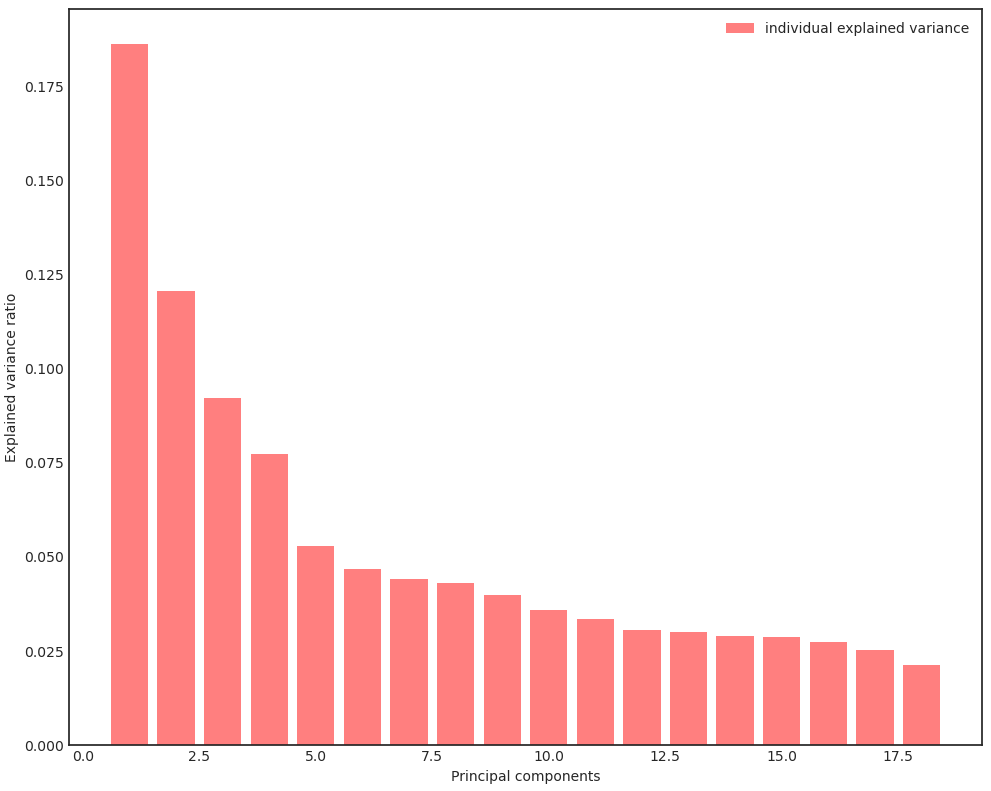

In [68]:
# Visualize explained variance
explained_variance = pca.explained_variance_ratio_
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 8))
    plt.bar(range(1, 19), explained_variance, alpha=0.5, align='center', label='individual explained variance', color='red')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

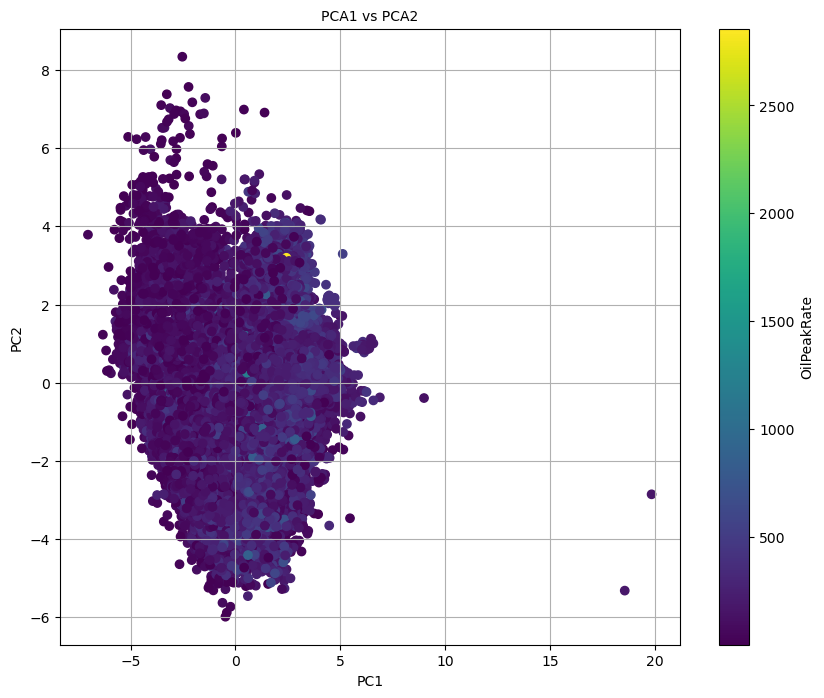

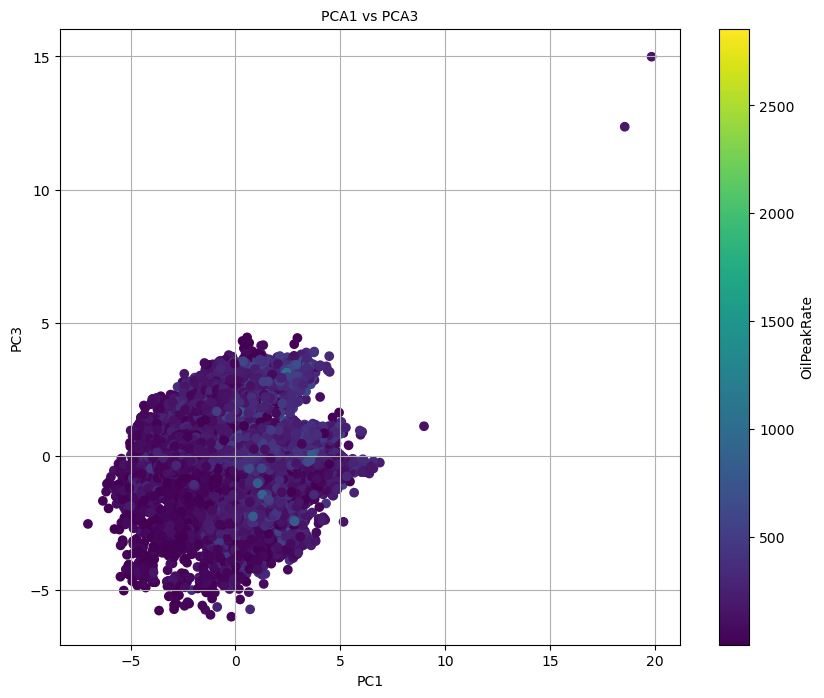

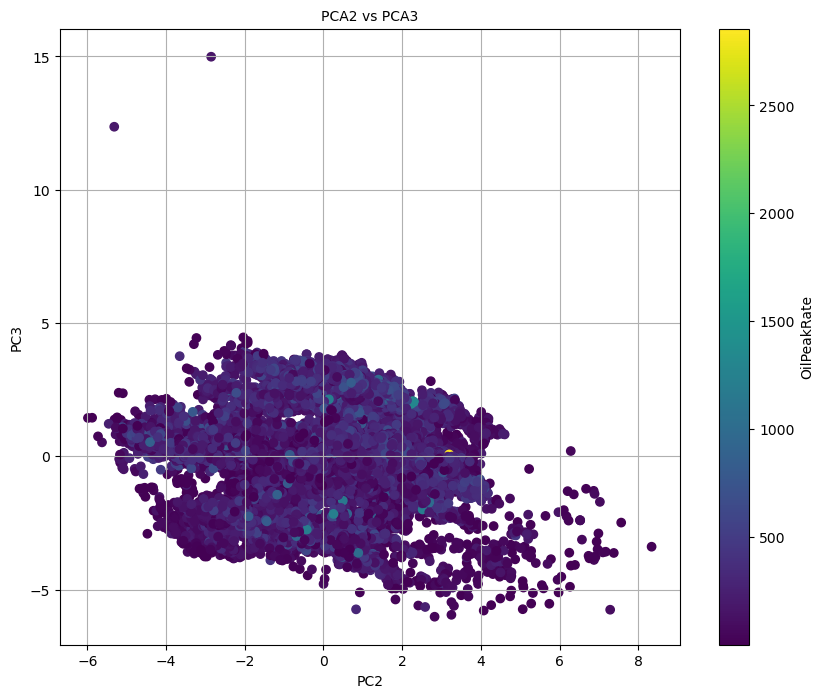

In [203]:
# Visualize first 2 principal components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 19)])
plt.figure(figsize=(10, 8))
plt.scatter(pca_df.PC1, pca_df.PC2, c=y_en, cmap='viridis')
plt.xlabel("PC1", fontsize=10)
plt.ylabel("PC2", fontsize=10)
plt.title("PCA1 vs PCA2", fontsize=10)
plt.colorbar(label='OilPeakRate')
plt.grid()
plt.show()

# Visualize first and third components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df.PC1, pca_df.PC3, c=y_en, cmap='viridis')
plt.xlabel("PC1", fontsize=10)
plt.ylabel("PC3", fontsize=10)
plt.title("PCA1 vs PCA3", fontsize=10)
plt.colorbar(label='OilPeakRate')
plt.grid()
plt.show()

# Visualize second and third components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df.PC2, pca_df.PC3, c=y_en, cmap='viridis')
plt.xlabel("PC2", fontsize=10)
plt.ylabel("PC3", fontsize=10)
plt.title("PCA2 vs PCA3", fontsize=10)
plt.colorbar(label='OilPeakRate')
plt.grid()
plt.show()


## Feature Selection

In [88]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': [3,7,12,15,18,20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


features = SelectKBest(mutual_info_regression,k=16)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(features.fit_transform(X_train_en, y_train_en), y_train_en)
best_params = grid.best_params_

In [91]:
knn = KNeighborsRegressor(**best_params)

k_best = features.fit_transform(X_train_en, y_train_en)
knn.fit(k_best, y_train_en)

y_pred_en = knn.predict(features.transform(X_val_en))


In [98]:
selected_cols=list(X_en.columns[features.get_support()])

In [97]:
features_knn=X_en[selected_cols]
features_knn.head(2)

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,bin_lateral_length,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y
0,1383493.751,717329.2368,1382854.564,712767.3700,1121.0,3963.582677,76000.0,2.219894e+06,8712.598425,19.174572,639.550085,1.0,1383030.678,714796.3610,1382668.912,712798.4321
1,1380344.035,711916.2732,1379738.429,707860.5643,1022.0,3179.133858,113000.0,5.610964e+05,8627.952756,35.544272,176.493480,1.0,1379965.126,709541.7145,1379630.025,707907.6708


### Model Implementation (stage 2)

From the above, we got our main models as catBoostClassifier, RandomForest and XGBOOST Regressor 

In [99]:
selected_cols

['surface_x',
 'surface_y',
 'bh_x',
 'bh_y',
 'standardized_operator_name',
 'gross_perforated_length',
 'total_proppant',
 'total_fluid',
 'true_vertical_depth',
 'proppant_intensity',
 'frac_fluid_intensity',
 'bin_lateral_length',
 'horizontal_midpoint_x',
 'horizontal_midpoint_y',
 'horizontal_toe_x',
 'horizontal_toe_y']

In [101]:
xgb_regressor_selected = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.69, learning_rate= 0.1,
                               max_depth= 9, n_estimators= 93, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_selected.fit(X_train_en[selected_cols], y_train_en)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.69, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [104]:
rmse_selected = np.sqrt(mean_squared_error(y_val_en, xgb_regressor_selected.predict(X_val_en[selected_cols])))
print("Root Mean Squared Error (XGBoost):", rmse_selected)

Root Mean Squared Error (XGBoost): 95.26566996021653


In [112]:
xgb_regressor_final = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.67, learning_rate= 0.05,
                               max_depth= 10, n_estimators= 183, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_final.fit(X_train_en[selected_cols], y_train_en)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.67, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=183, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
y_pred_xgb_final=xgb_regressor_final.predict(X_val_en[selected_cols])
rmse_xgb_final = np.sqrt(mean_squared_error(y_val_en, y_pred_xgb_final))
print("Root Mean Squared Error (XGBoost):", rmse_xgb_final)

Root Mean Squared Error (XGBoost): 93.69566202778495


In [126]:
r2 = r2_score(y_val_en, y_pred_xgb_final)
print("R-squared (R2):", r2)

# Calculate adjusted R2
n = len(y_val_en)  
p = len(selected_cols) 

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

R-squared (R2): 0.6293563867751167
Adjusted R-squared: 0.6278140466420613


In [153]:
RF_regressor_final = RandomForestRegressor(n_estimators=600, max_features='log2', max_depth=30,random_state=42)
RF_regressor_final.fit(X_train_en[selected_cols], y_train_en)

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=600,
                      random_state=42)

In [154]:
y_pred_rf_final=RF_regressor_final.predict(X_val_en[selected_cols])
rmse_rf_final = np.sqrt(mean_squared_error(y_val_en, y_pred_rf_final))
print(f'Root Mean Squared Error on validation set: {rmse_rf_final}')

Root Mean Squared Error on validation set: 93.85637105273864


In [155]:
r2_rf = r2_score(y_val_en, y_pred_rf_final)
print("R-squared (R2):", r2_rf)

# Calculate adjusted R2
n = len(y_val_en)  
p = len(selected_cols) 

adjusted_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2_rf)

R-squared (R2): 0.6280838228866431
Adjusted R-squared: 0.6265361872991753


In [161]:
cat_idx = [idx for idx, col in enumerate(training_data.columns) if col in selected_cols]

In [164]:
for col_idx in cat_idx:
    X_train.iloc[:, col_idx] = X_train.iloc[:, col_idx].astype(str)
    X_val.iloc[:, col_idx] = X_val.iloc[:, col_idx].astype(str)

# Create CatBoost pools using selected columns
training_pool = Pool(X_train[selected_cols], y_train, cat_features=selected_cols)
val_pool = Pool(X_val[selected_cols], y_val, cat_features=selected_cols)

# Initialize and train the CatBoostRegressor
cat_regressor = CatBoostRegressor(iterations=1000, verbose=100, learning_rate=0.3, loss_function='RMSE')
cat_regressor.fit(training_pool, eval_set=val_pool)

# Make predictions on the validation set
y_pred_cat = cat_regressor.predict(val_pool)


0:	learn: 145.2741648	test: 142.7906035	best: 142.7906035 (0)	total: 52.8ms	remaining: 52.7s
100:	learn: 120.5413958	test: 120.5414375	best: 120.5160972 (99)	total: 7.35s	remaining: 1m 5s
200:	learn: 115.9652626	test: 121.1440781	best: 120.4551948 (106)	total: 14.8s	remaining: 58.7s
300:	learn: 112.6787715	test: 121.6325614	best: 120.4551948 (106)	total: 22.7s	remaining: 52.7s
400:	learn: 110.5990040	test: 122.3301019	best: 120.4551948 (106)	total: 30.7s	remaining: 45.8s
500:	learn: 108.0380707	test: 122.8906221	best: 120.4551948 (106)	total: 38.5s	remaining: 38.4s
600:	learn: 105.7368064	test: 123.7933787	best: 120.4551948 (106)	total: 46.7s	remaining: 31s
700:	learn: 103.9590938	test: 124.2522707	best: 120.4551948 (106)	total: 55.1s	remaining: 23.5s
800:	learn: 102.2548205	test: 124.7756107	best: 120.4551948 (106)	total: 1m 3s	remaining: 15.7s
900:	learn: 100.5936244	test: 125.4122435	best: 120.4551948 (106)	total: 1m 11s	remaining: 7.84s
999:	learn: 99.2283647	test: 126.0352755	best

In [166]:
cat_regressor_final = CatBoostRegressor(iterations=2000, verbose=200, learning_rate=0.4, loss_function='RMSE')
cat_regressor_final.fit(training_pool, eval_set=val_pool)

# Make predictions on the validation set
y_pred_cat_final = cat_regressor.predict(val_pool)

0:	learn: 142.3364770	test: 139.7597420	best: 139.7597420 (0)	total: 64.3ms	remaining: 2m 8s
200:	learn: 113.6218039	test: 122.1057137	best: 121.2507631 (79)	total: 18.2s	remaining: 2m 42s
400:	learn: 107.1848776	test: 123.6438000	best: 121.2507631 (79)	total: 37.3s	remaining: 2m 28s
600:	learn: 102.5073641	test: 125.2136316	best: 121.2507631 (79)	total: 56.2s	remaining: 2m 10s
800:	learn: 98.5284024	test: 126.4615324	best: 121.2507631 (79)	total: 1m 14s	remaining: 1m 51s
1000:	learn: 95.1709526	test: 127.8476936	best: 121.2507631 (79)	total: 1m 36s	remaining: 1m 36s
1200:	learn: 92.5538984	test: 128.7997252	best: 121.2507631 (79)	total: 1m 56s	remaining: 1m 17s
1400:	learn: 90.0872897	test: 129.7091702	best: 121.2507631 (79)	total: 2m 15s	remaining: 58.1s
1600:	learn: 87.6204214	test: 130.7519401	best: 121.2507631 (79)	total: 2m 36s	remaining: 39s
1800:	learn: 85.5005702	test: 131.4086838	best: 121.2507631 (79)	total: 2m 56s	remaining: 19.5s
1999:	learn: 83.6796889	test: 132.1971133	b

## Model Training and target null values

In [168]:
xgb_regressor_impute = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.67, learning_rate= 0.05,
                               max_depth= 10, n_estimators= 183, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_impute.fit(X_en[selected_cols], y_en)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.67, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=183, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [169]:
y_pred_xgb_impute=xgb_regressor_final.predict(X_test_en[selected_cols])

In [170]:
y_test_en=y_pred_xgb_impute

In [185]:
y_test_en_df = pd.DataFrame(y_test_en, columns=['OilPeakRate'])
train_data_com = pd.concat([X_en, y_en], axis=1)
test_data_com = pd.concat([X_test_en, y_test_en_df], axis=1)
combined_data = pd.concat([train_data_com, test_data_com], axis=0)

combined_data.reset_index(drop=True, inplace=True)

In [193]:
test_en['OilPeakRate']=y_pred_xgb_impute

In [198]:
complete_encoded_data=pd.concat([train_en,test_en],axis=0)

In [199]:
len(complete_encoded_data.columns)

36

In [202]:
complete_encoded_data.to_csv("Complete_data_no_nulls.csv")

In [204]:
xgb_regressor_r = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.67, learning_rate= 0.05,
                               max_depth= 10, n_estimators= 183, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
xgb_regressor_r.fit(X[selected_cols], y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.67, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=183, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [206]:
X_test_real = training_data[training_data['OilPeakRate'].isnull()==True].drop('OilPeakRate', axis=1)  
y_test_real = training_data[training_data['OilPeakRate'].isnull()==True]['OilPeakRate'] 
y_pred_xgb_=xgb_regressor_r.predict(X_test_real[selected_cols])

## Final training with the entire data after imputation

In [200]:
len(complete_encoded_data.columns)

36

In [201]:
model_xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree= 0.67, learning_rate= 0.05,
                               max_depth= 10, n_estimators= 183, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.82, random_state=42)
model_xgb.fit(complete_encoded_data[selected_cols], complete_encoded_data["OilPeakRate"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.67, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=183, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [207]:
final_test_data=pd.read_csv(dirname+"scoring_data.csv")

In [210]:
y_pred_test=model_xgb.predict(final_test_data[selected_cols])

In [217]:
submission_df=pd.DataFrame(y_pred_test, columns=['OilPeakRate'])

In [218]:
submission_df.to_excel(dirname+"submission_file.xlsx")